About Data set:
This data set contains a single file which compares various booking information between two hotels: a city hotel and a resort hotel.
This database contains real data extracted from the following article:
Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for  Data in Brief, Volume 22, February 2019. 

Note: Names, emails, phone numbers, and credit card numbers are artificial datas. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2-1:read the data set

In [2]:
df=pd.read_csv("hotel_booking.csv")

2-2:check the basic data set information

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

2-3:How many rows does this dataset have?

In [5]:
df.shape[0]

119390

2-4:Does this data set have missing data?if the answer is yes,which column does have the most number of missing data?

In [6]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df.count().idxmin()

'company'

2-5:Delet the company column from the data set.

In [8]:
df.drop(axis=1,columns="company",inplace=True)

2-6which countries do have the most number of travelers?Identify the five countries having the most number of travelers.

In [9]:
df["country"].value_counts()[0:5]

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64

2-7:Identify the person who has the highest Rate Daily Average (ADR).
How much is it?

In [10]:
price=df["adr"].max()
rownum=df["adr"].idxmax()
name=df.loc[rownum]["name"]
print("The name is {} and the amount of ADR is {}.".format(name, price))




The name is Daniel Walter and the amount of ADR is 5400.0.


2-8:Identity the average of ADR numbers.(accuracy to two decimal places)

In [11]:
averagea=df["adr"].mean()
averageb=round(averagea,2)
print(averageb)

101.83


2-9:Identity the Number of nights of stay.(accuracy to two decimal places) 

In [12]:
total = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
average=total.mean()
average=round(average,2)
print(average)

3.43


2-10:Identity the names and the email addresses of people who have 5  special requests.

In [13]:
new=df[df["total_of_special_requests"]==5]
new[["name","email","total_of_special_requests"]]





,name,email,total_of_special_requests
7860,Amanda Harper,Amanda.H66@yahoo.com,5
11125,Laura Sanders,Sanders_Laura@hotmail.com,5
14596,Tommy Ortiz,Tommy_O@hotmail.com,5
14921,Gilbert Miller,Miller.Gilbert@aol.com,5
14922,Timothy Torres,TTorres@protonmail.com,5
24630,Jennifer Weaver,Jennifer_W@aol.com,5
27288,Crystal Horton,Crystal.H@mail.com,5
27477,Brittney Burke,Burke_Brittney16@att.com,5
29906,Cynthia Cabrera,Cabrera.Cynthia@xfinity.com,5
29949,Sarah Floyd,Sarah_F@gmail.com,5


2-11:What are the most repeated familynames?Identity 5 familyname which are the most repeated.

In [14]:
new=df["name"].apply(lambda  x:x.split()[1])
df["familynames"]=new
df["familynames"].value_counts()[0:5]

Smith       2510
Johnson     1998
Williams    1628
Jones       1441
Brown       1433
Name: familynames, dtype: int64

2-12:Identity travelers having the most number of babies and chidren.

In [15]:
df["new"]=df["babies"]+df["children"]
df["new"].max()
name=df[df["new"]==10]
print(name)


              hotel  is_canceled  lead_time  arrival_date_year  \
328    Resort Hotel            1         55               2015   
46619    City Hotel            0         37               2016   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
328                 July                        29                         12   
46619            January                         3                         12   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
328                          4                    10       2  ...   
46619                        0                     2       2  ...   

       required_car_parking_spaces  total_of_special_requests  \
328                              0                          1   
46619                            0                          1   

      reservation_status reservation_status_date             name  \
328              No-Show              2015-07-12    Jamie Ramirez   
46619          

2-13:Identity the phonecode of areas which have the most number of reservations.

In [16]:
df["phone-number"].apply(lambda   x:x[0:3]).value_counts()[0:3]



799    168
185    167
541    166
Name: phone-number, dtype: int64

# Exploratory Data Analysis

# duration of stay

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'duration of stay')

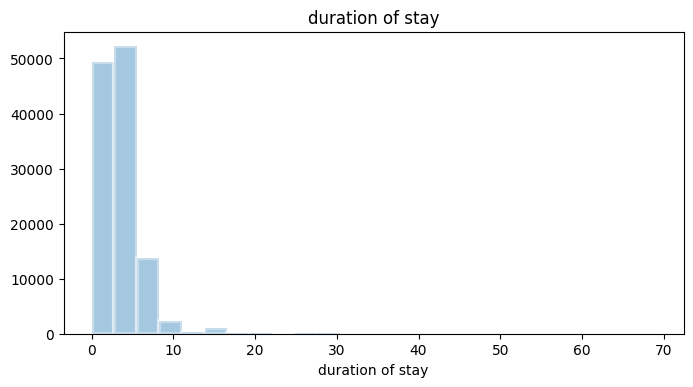

In [17]:
df["duration of stay"] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
fig=plt.figure(figsize=(8,4),dpi=100)
sns.distplot(df["duration of stay"], kde=False,hist_kws=dict(edgecolor="w",linewidth=3),bins=25)
plt.title("duration of stay")

 ***As we see,most people stayed under 5 days and few people stayed more than 10 days.***

# Which hotel have more cancellations?

<AxesSubplot:xlabel='hotel', ylabel='is_canceled'>

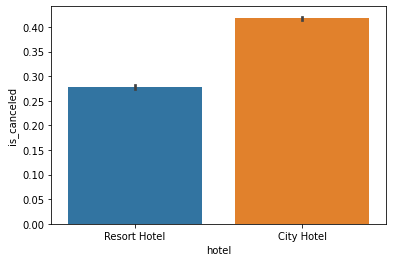

In [18]:
sns.barplot(data=df,x="hotel",y="is_canceled")

**As we see,city hotel have more number of cancellations.**

# the busiest month

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

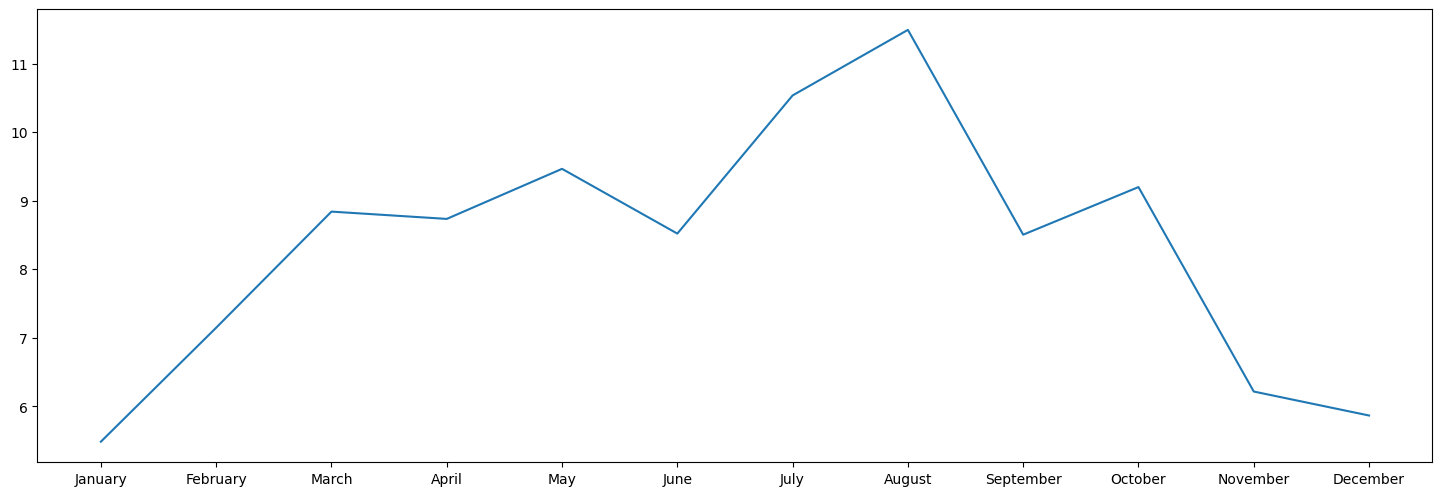

In [19]:
df_not_canceled = df[df['is_canceled'] == 0]
import calendar

sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(calendar.month_name[1:])
fig=plt.figure(figsize=(18,6),dpi=100)
x = sorted_months.index
y = sorted_months/sorted_months.sum()*100
sns.lineplot(x, y.values)

**As we can see most bookings were made from July to August. And the least bookings were made at the start and end of the year.**

# the stay duration trend for each hotel type

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<AxesSubplot:title={'center':'Hotel wise night stay duration (Top 10)'}, xlabel='total_nights', ylabel='count'>

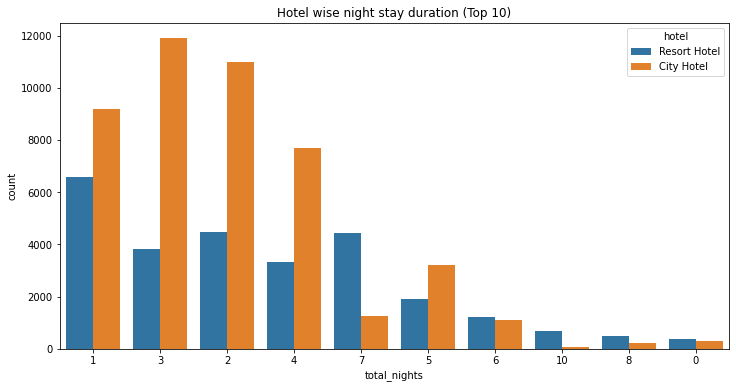

In [20]:
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
              order = df_not_canceled.total_nights.value_counts().iloc[:10].index,ax=ax)


**As we see,for city hotel the most stay duration is one,three and two and for resort hotel the most stay duration is one, two and seven.**